# Exercise_2 Data analisys


In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline 

## Data manipulation

In [2]:
r1_c_1=pd.read_csv('region1_company1.csv')
r1_c_2=pd.read_csv('region1_company2.csv')
r2_c_1=pd.read_csv('region2_company1.csv')
r2_c_2=pd.read_csv('region2_company2.csv')

In [3]:
r1_c_1.head() 


,Sales_U,Sales_USD,Date
0,124885,129350,JAN0591.1
1,105285,107408,JAN1291.1
2,138363,136313,JAN1991.1
3,111494,113805,JAN2691.1
4,110686,113761,FEB0291.1


In [4]:
date=pd.to_datetime(r1_c_1.Date,format="%b%d%y.1")

## Task 1

# Region 1 Company 1 Timeseries

Text(0.5, 1.0, 'Region 1 company 1')

<Figure size 640x480 with 0 Axes>

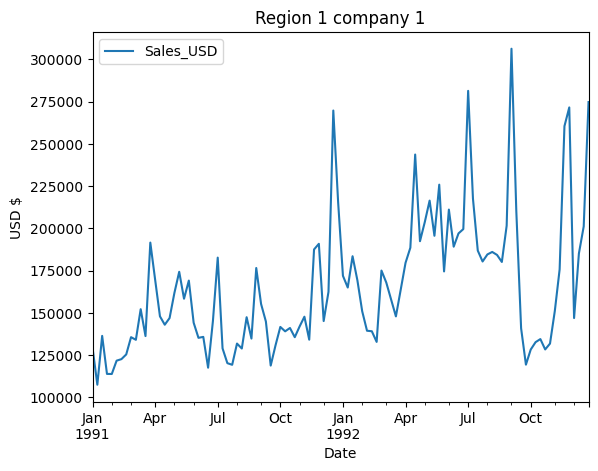

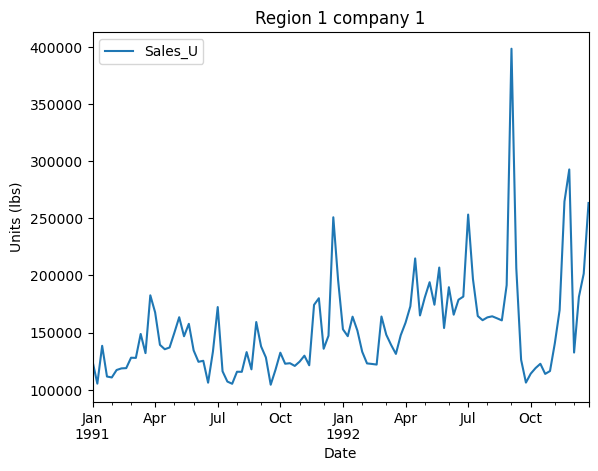

In [5]:
r1_c_1.Date=date
plt.figure(1)
r1_c_1.plot.line(y="Sales_USD",x="Date")
plt.ylabel("USD $")
plt.title("Region 1 company 1")

plt.figure(2)
r1_c_1.plot.line(y="Sales_U",x="Date")
plt.ylabel("Units (lbs)")
plt.title("Region 1 company 1")

# Region 1 Company 2 Timeseries

Text(0.5, 1.0, 'Region 1 company 2')

<Figure size 640x480 with 0 Axes>

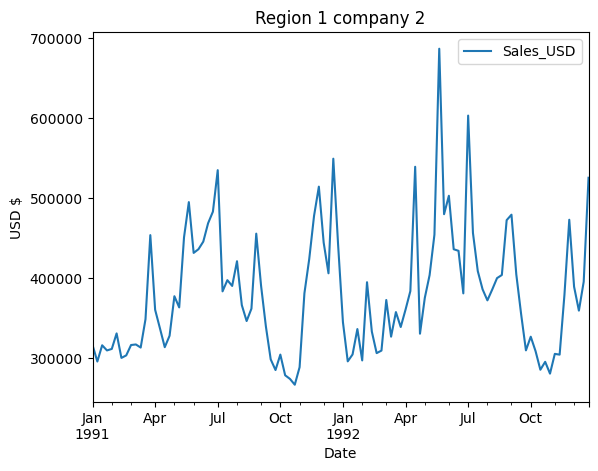

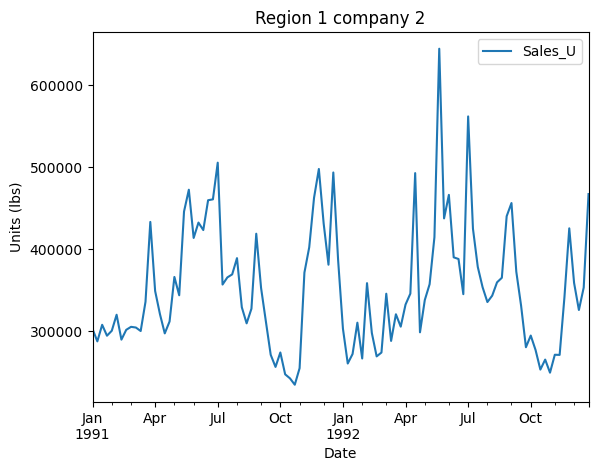

In [6]:
r1_c_2.Date=date
plt.figure(4)
r1_c_2.plot.line(y="Sales_USD",x="Date")
plt.ylabel("USD $")
plt.title("Region 1 company 2")
plt.figure(5)
r1_c_2.plot.line(y="Sales_U",x="Date")
plt.ylabel("Units (lbs)")
plt.title("Region 1 company 2")

# Region 2 company 1 Timeseries

Text(0.5, 1.0, 'Region 2 company 1')

<Figure size 640x480 with 0 Axes>

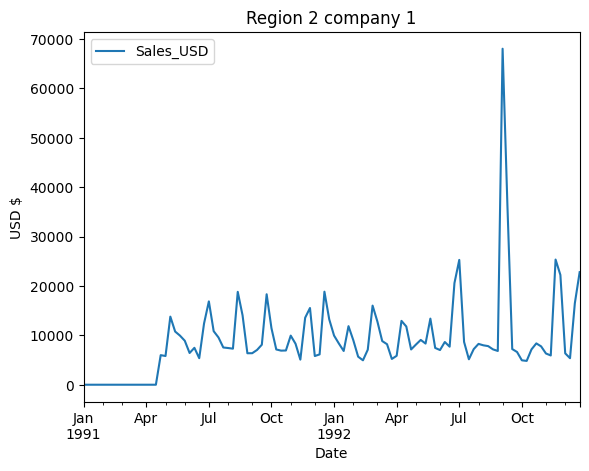

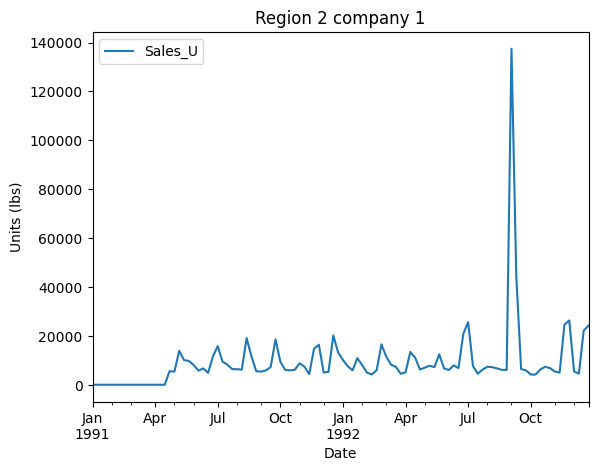

In [7]:
r2_c_1.Date=date
plt.figure(5)
r2_c_1.plot.line(y="Sales_USD",x="Date")
plt.ylabel("USD $")
plt.title("Region 2 company 1")

plt.figure(6)
r2_c_1.plot.line(y="Sales_U",x="Date")
plt.ylabel("Units (lbs)")
plt.title("Region 2 company 1")

# Region 2 company 2 Timeseries

Text(0.5, 1.0, 'Region 2 company 2')

<Figure size 640x480 with 0 Axes>

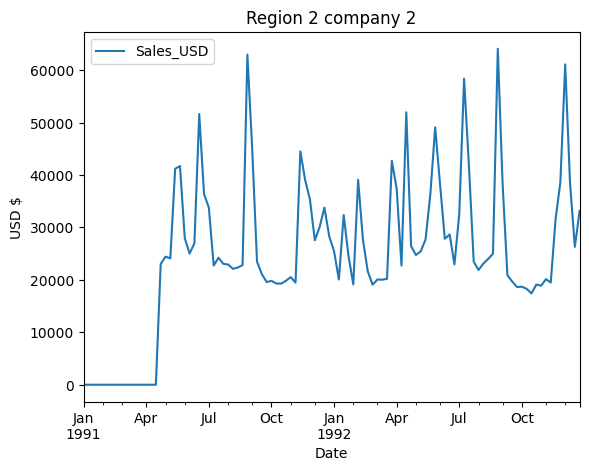

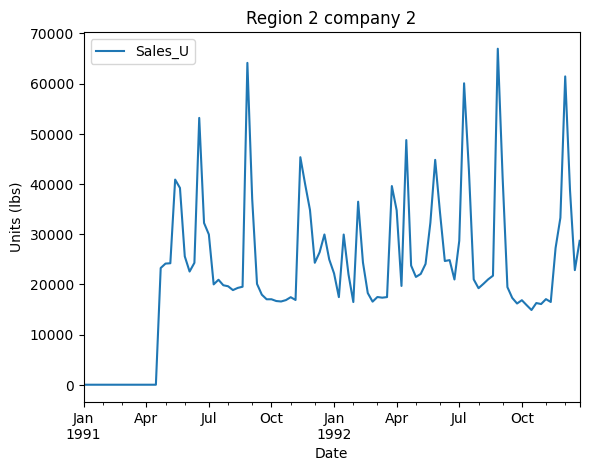

In [8]:
r2_c_2.Date=date
plt.figure(7)
r2_c_2.plot.line(y="Sales_USD",x="Date")
plt.ylabel("USD $")
plt.title("Region 2 company 2")

plt.figure(8)
r2_c_2.plot.line(y="Sales_U",x="Date")
plt.ylabel("Units (lbs)")
plt.title("Region 2 company 2")

# Comparing price policies

## Data manipulation

In [9]:
Region1=pd.DataFrame()
Region2=pd.DataFrame()
Region1['Price Company 1']=r1_c_1.Sales_USD/r1_c_1.Sales_U
Region1['Price Company 2']=r1_c_2.Sales_USD/r1_c_2.Sales_U
Region2['Price Company 1']=r2_c_1.Sales_USD/r2_c_1.Sales_U
Region2['Price Company 2']=r2_c_2.Sales_USD/r2_c_2.Sales_U
Region1['Date']=date
Region2['Date']=date

### Region 1

Text(0, 0.5, 'Price per unit(USD $ / lbs)')

<Figure size 640x480 with 0 Axes>

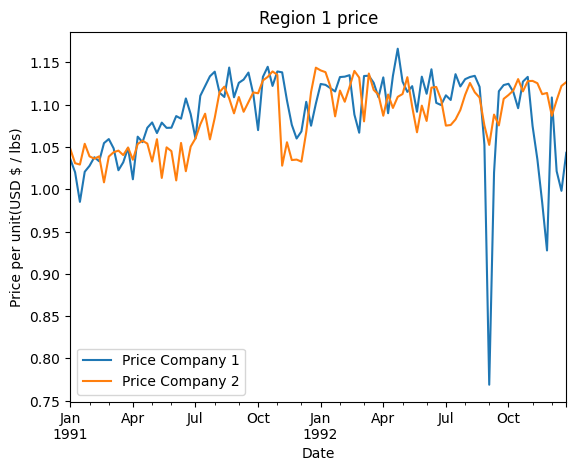

In [10]:
plt.figure('Region 1 price policies')
Region1.plot.line(x="Date",y=["Price Company 1","Price Company 2"])
plt.title('Region 1 price')
plt.ylabel('Price per unit(USD $ / lbs)')


As we can see this is a classical model of dinamyc price strategy.
It is relevant the changes of prices at the final weeks of July 1992.
Let´s talk about the stability of the price, as u can see Company 2 prices are more stable than company 1.
The two companies use a model of high low-price but the amplitude is different.

On 1992, company one prefer to use a hard model to high-low price, this could be done for many reasons for example to achive more engament.
This strategy for company 1 is important at the finals months of the year as we can see on the minimum price.

Company 2 has a more stable model, maybe they are using a loyalty model for clients.

But company 1 it is centered on dynamic price strategy.





### Region 2

Text(0, 0.5, 'Price per unit(USD $ / lbs)')

<Figure size 640x480 with 0 Axes>

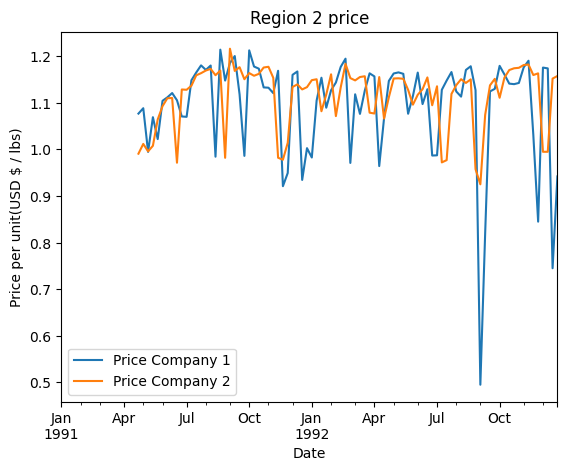

In [11]:
plt.figure('Region 2 price policies')
Region2.plot.line(x="Date",y=["Price Company 1","Price Company 2"])
plt.title('Region 2 price')
plt.ylabel('Price per unit(USD $ / lbs)')

Well, there is no data at the head, maybe there was reforms on shopping center.
Pranks apart, pricing police on this region its quite similar to the other.
Lets talk about diferences.
On this Region company 2 has decided to refuse loyalty model for clients.
The prices of the two companis are very similar on July 1991 
maybe one of the companies use a  model based on see what do the other.
On the other hand, on July 1992 company one use the same model of high-low.
This is my hipotesis but have to be contrasted with the grow of this market, 
because the prices on this month falls.


## Task 2

### Sales vs Price

#### Company 1

Text(0, 0.5, 'Price per unit(USD $ / lbs)')

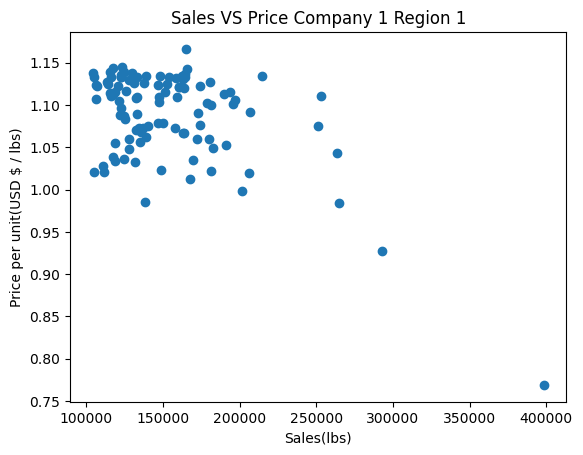

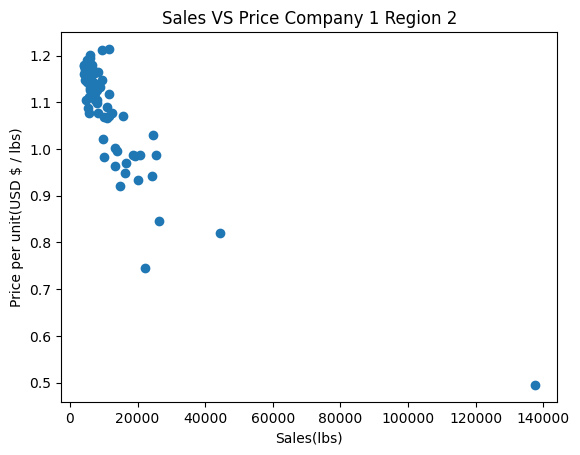

In [12]:
Region1['Price_Company_1']=r1_c_1.Sales_USD/r1_c_1.Sales_U
Region2['Price_Company_1']=r2_c_1.Sales_USD/r2_c_1.Sales_U


plt.figure('Sales VS Price Company 1 Region 1')
plt.scatter(x=r1_c_1.Sales_U,y=Region1.Price_Company_1)
plt.title('Sales VS Price Company 1 Region 1')
plt.xlabel('Sales(lbs)')
plt.ylabel('Price per unit(USD $ / lbs)')

plt.figure('Sales VS Price Company 1 Region 2')
plt.scatter(x=r2_c_1.Sales_U,y=Region2.Price_Company_1)
plt.title('Sales VS Price Company 1 Region 2')
plt.xlabel('Sales(lbs)')
plt.ylabel('Price per unit(USD $ / lbs)')



for company 1 we have that demand in region 2 is more elastic than region 1

#### Company 2

Text(0, 0.5, 'Price per unit(USD $ / lbs)')

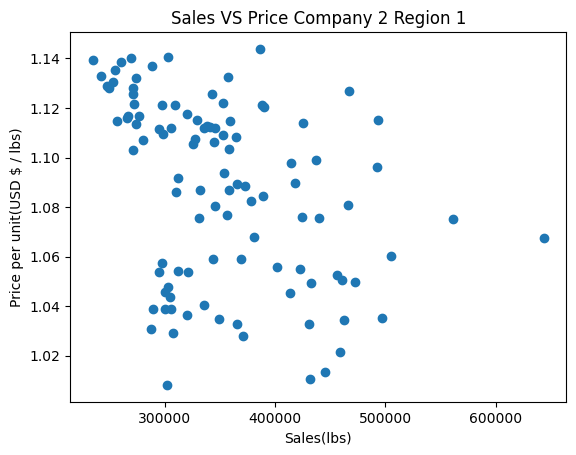

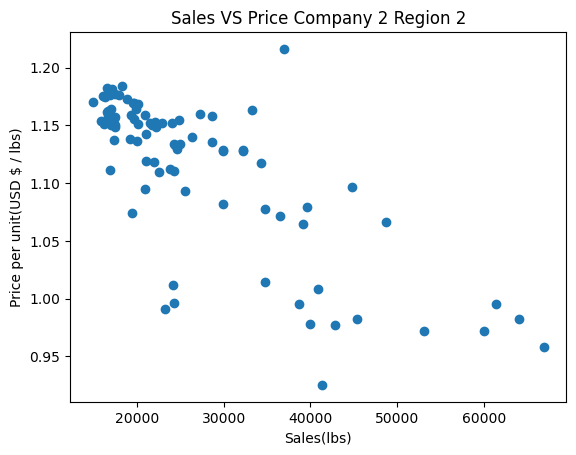

In [13]:
Region1['Price_Company_2']=r1_c_2.Sales_USD/r1_c_2.Sales_U
Region2['Price_Company_2']=r2_c_2.Sales_USD/r2_c_2.Sales_U


plt.figure('Sales VS Price Company 2 Region 1')
plt.scatter(x=r1_c_2.Sales_U,y=Region1.Price_Company_2)
plt.title('Sales VS Price Company 2 Region 1')
plt.xlabel('Sales(lbs)')
plt.ylabel('Price per unit(USD $ / lbs)')

plt.figure('Sales VS Price Company 2 Region 2')
plt.scatter(x=r2_c_2.Sales_U,y=Region2.Price_Company_2)
plt.title('Sales VS Price Company 2 Region 2')
plt.xlabel('Sales(lbs)')
plt.ylabel('Price per unit(USD $ / lbs)')

we have that demand in region 2 is more elastic than region 1 
We should do a more rigorous analisys to afirm that.
As we can see the slope curve of sales-price  is negative.It makes sense in a classical view of demand-curve.

## Task 3

In [14]:
def linear_regresion(x,m,n):
    return m*x+n

Q12=np.log(r1_c_2.Sales_U)
Q21=np.log(r2_c_1.Sales_U)
Q11=np.log(r1_c_1.Sales_U)
Q22=np.log(r2_c_2.Sales_U)

p12=np.log(Region1.Price_Company_2)
p21=np.log(Region2.Price_Company_1)
p22=np.log(Region2.Price_Company_2)
p11=np.log(Region1.Price_Company_1)

#NaN data filter
Q21.replace([np.inf,-np.inf],np.nan,inplace=True)
Q21=Q21.dropna(how='all')
Q22.replace([np.inf,-np.inf],np.nan,inplace=True)
Q22=Q22.dropna(how='all')

p21=p21.dropna(how='all')
p22=p22.dropna(how='all')



Calculate elasticity coeficient

In [15]:
elasticidad_12, param_cov12 = curve_fit(linear_regresion, p12, Q12)
[elasticidad_12]

[array([-2.37653965, 12.94772427])]

In [16]:
elasticidad_21, param_cov21 = curve_fit(linear_regresion, p21, Q21)
[elasticidad_21]

[array([-4.16721374,  9.39761497])]

In [17]:
elasticidad_11, param_cov11 = curve_fit(linear_regresion, p11, Q11)
[elasticidad_11]

[array([-2.1056719 , 12.08332638])]

In [18]:
elasticidad_22, param_cov22 = curve_fit(linear_regresion, p22, Q22)
[elasticidad_22]

[array([-4.58358985, 10.60443472])]

#### Discuss

elasticidad_12 its the elasticity of region 1 company 2

As we can see the absolute value of elasticity in region 2 is higher than in region one.
In absolute value region 2 elasticity is approximately 4-5, on the other hand elasticity in region 1 is approximately 2.

So we can say that the demand of prices in region 2 it is more elastic than in region 1.


## Task 4

In [19]:
ELASTICITY_REGION_COMPANY_1=elasticidad_11[0]

In [20]:
DELTA_SALES=ELASTICITY_REGION_COMPANY_1*10

In [21]:
print(DELTA_SALES)

-21.056719028396877


If company 1 increase the price 10% on region 1, sales will be reduced on approximately 21%.
We can calculate the error of the mesure to obtain more accuracy.